# Exploratory Data Analysis

This section is to explore the data, in terms of its attributes and properties, to determine areas of further analysis.

Some data dimensions and distribution break-downs will be displayed in this section as well.










In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import range_unit_root_test
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [ ]:
data = pd.read_csv("./airtraffic.csv", header=0) # set header=1 for naming purposes

In [ ]:
data.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,"31,432",2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,"31,353",2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,"2,518",2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
3,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,"1,324",2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
4,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,"1,198",2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM


Basic data dimensions

In [ ]:
print(f"The dimension in the original data is {data.shape}")

The dimension in the original data is (35172, 15)


In [ ]:
data.columns = [
    "activity_period", "start_date", "airline", "operating_code",
    "published_airline", "published_code","geo", "region", "activity_code",
    "price_category", "terminal", "boarding_area", "passengers",
    "data_as_of", "data_load_time"
]

In [ ]:
data.head()

,activity_period,start_date,airline,operating_code,published_airline,published_code,geo,region,activity_code,price_category,terminal,boarding_area,passengers,data_as_of,data_load_time
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,"31,432",2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,"31,353",2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,"2,518",2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
3,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,"1,324",2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
4,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,"1,198",2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM


In [1]:
# statistics: avg, total
# number of instances of data: count
# dimensions
# check for NA values
# data types: discrete vs continuous

In [ ]:
def understand_df(data):

    # Dimensions of dataset
    print(f"The dimension in the original data is {data.shape} \n")

    # Head of dataset
    print("First 10 rows of the dataset are \n", data.head(10), "\n\n")

    # Summary of dataset
    print("Summary of the dataset is \n", data.describe(), "\n\n")

    # Stats of dataset
    stats = []
    for col in data.columns:
        stats.append((col, data[col].nunique(), data[col].isnull().sum() * 100 / data.shape[0], data[col].value_counts(normalize=True, dropna=False).values[0] * 100, data[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
    print("Statistics of the dataset are \n", stats_df.sort_values('Percentage of missing values', ascending=False), "\n\n")

In [ ]:
understand_df(data)

The dimension in the original data is (35172, 15) 

First 10 rows of the dataset are 
    activity_period  start_date                                  airline  \
0           199907  1999/07/01                             ATA Airlines   
1           199907  1999/07/01                             ATA Airlines   
2           199907  1999/07/01                             ATA Airlines   
3           199907  1999/07/01  Aeroflot Russian International Airlines   
4           199907  1999/07/01  Aeroflot Russian International Airlines   
5           199907  1999/07/01                               Air Canada   
6           199907  1999/07/01                               Air Canada   
7           199907  1999/07/01                                Air China   
8           199907  1999/07/01                                Air China   
9           199907  1999/07/01                               Air Europe   

  operating_code                        published_airline published_code  \
0          

In [ ]:
#breakdown = pd.DataFrame(data.time.value_counts())
#breakdown
data['yy-mm'] = pd.to_datetime(data['start_date']).dt.strftime('%Y-%m')
data['year'] = pd.to_datetime(data['start_date']).dt.strftime('%Y')
data['month'] = pd.to_datetime(data['start_date']).dt.strftime('%m')

In [ ]:
data.head()

,activity_period,start_date,airline,operating_code,published_airline,published_code,geo,region,activity_code,price_category,terminal,boarding_area,passengers,data_as_of,data_load_time,yy-mm,year,month
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,"31,432",2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM,1999-07,1999,07
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,"31,353",2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM,1999-07,1999,07
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,"2,518",2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM,1999-07,1999,07
3,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,"1,324",2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM,1999-07,1999,07
4,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,"1,198",2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM,1999-07,1999,07


In [ ]:
data.passengers.describe()

count     35172
unique    21439
top           1
freq         21
Name: passengers, dtype: object

In [ ]:
data['passengers'] = data['passengers'].str.replace(',', '')

In [ ]:
data.dtypes

activity_period       int64
start_date           object
airline              object
operating_code       object
published_airline    object
published_code       object
geo                  object
region               object
activity_code        object
price_category       object
terminal             object
boarding_area        object
passengers           object
data_as_of           object
data_load_time       object
yy-mm                object
year                 object
month                object
dtype: object

In [ ]:
data = data.astype({"passengers": "float32",
             "year": "int32",
             "month": "int32"
             })
# in order for this to work

In [ ]:
data.passengers.describe()

count     35172.000000
mean      28000.507812
std       62772.761719
min           0.000000
25%        4452.000000
50%        8634.000000
75%       19893.750000
max      856501.000000
Name: passengers, dtype: float64

In [ ]:
data.passengers.value_counts()

1.0         21
2.0         19
10.0        16
4.0         16
138.0       14
            ..
326272.0     1
43928.0      1
320658.0     1
61687.0      1
21211.0      1
Name: passengers, Length: 21439, dtype: int64

The general description of monthly passenger count is:
1. Mean is roughly 28000
2. Standard deviation is roughly 62772
3. 25th percentile and 75th percentile are 4452 and 19893
4. Median is roughly 8634
5. Max and min are 0 and 856501

NOTE: passenger count is on a monthly basis.

In [ ]:
from scipy.stats import norm

# create mu, sigma
mu, sigma = data.passengers.mean(), data.passengers.std()

# standardize data
data["z"] = data["passengers"].apply(lambda x: (x-mu)/sigma)
# not this: np.random.normal(mu, sigma, 239)

In [ ]:
# Plotting can be repetitive. Here's a function that automates the process.

def plot_time_series(df, x, y, title, xlabel, ylabel, compare=False, y2=None, ylabel2=None, color="blue", figsize=False):
    if figsize is True:
      f, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    else:
      f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
    sns.lineplot(data=df, x=df[x], y=df[y], color=color, ax=ax)

    # For comparisons:
    if compare == True:
      plt.plot(df[y2], label=ylabel2, color = 'red')
      plt.title("Actual vs Predicted Plane Ticket Interest over Time")
    else:
      plt.title(title)
    plt.xlabel(xlabel)
    plt.legend()
    plt.ylabel(ylabel)
    plt.rc({'font.size': 16})
    plt.tight_layout()
    plt.show()

In [ ]:
data.columns

Index(['activity_period', 'start_date', 'airline', 'operating_code',
       'published_airline', 'published_code', 'geo', 'region', 'activity_code',
       'price_category', 'terminal', 'boarding_area', 'passengers',
       'data_as_of', 'data_load_time', 'yy-mm', 'year', 'month', 'z'],
      dtype='object')

#### By Year

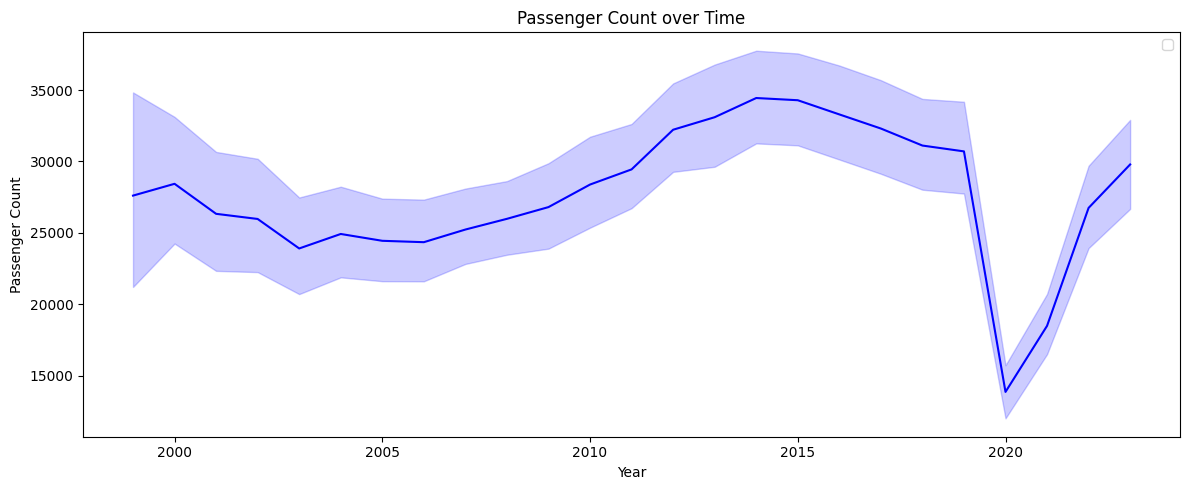

In [ ]:
plot_time_series(df=data, x="year", y="passengers",
                 title="Passenger Count over Time",
                 xlabel="Year", ylabel="Passenger Count")

#### Overall

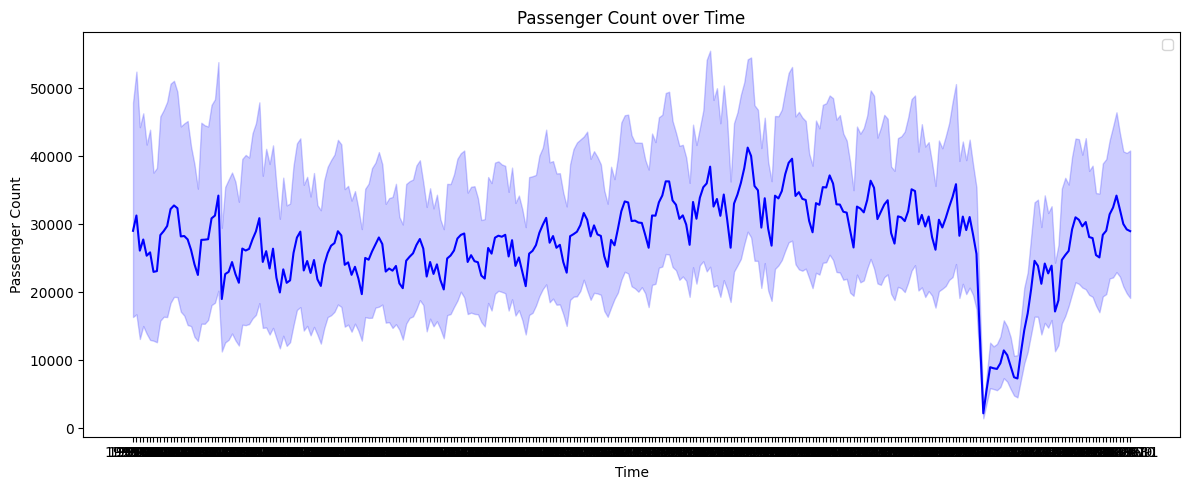

In [ ]:
plot_time_series(df=data, x="yy-mm", y="passengers",
                 title="Passenger Count over Time",
                 xlabel="Time", ylabel="Passenger Count", figsize=(24, 8))

Why is there a range of values?
It could be that data collection took place multiple times a day so we need a method to account for the difference.

#### More breakdowns by airlines and months

In [ ]:
airmonth = pd.DataFrame(data.groupby(["airline", "yy-mm"], as_index=False).agg({'passengers': [np.sum, np.mean]}))

In [ ]:
airmonth.head(10), airmonth.tail(10)

(                                    airline    yy-mm passengers        
                                                             sum    mean
 0  ABC Aerolineas S.A. de C.V. dba Interjet  2018-03     2302.0  1151.0
 1  ABC Aerolineas S.A. de C.V. dba Interjet  2018-04     4083.0  2041.5
 2  ABC Aerolineas S.A. de C.V. dba Interjet  2018-05     3846.0  1923.0
 3  ABC Aerolineas S.A. de C.V. dba Interjet  2018-06     5354.0  2677.0
 4  ABC Aerolineas S.A. de C.V. dba Interjet  2018-07     4911.0  2455.5
 5  ABC Aerolineas S.A. de C.V. dba Interjet  2018-08     5831.0  2915.5
 6  ABC Aerolineas S.A. de C.V. dba Interjet  2018-09     4832.0  2416.0
 7  ABC Aerolineas S.A. de C.V. dba Interjet  2018-10     5963.0  2981.5
 8  ABC Aerolineas S.A. de C.V. dba Interjet  2018-11     4945.0  2472.5
 9  ABC Aerolineas S.A. de C.V. dba Interjet  2018-12    12627.0  6313.5,
                  airline    yy-mm passengers        
                                          sum    mean
 12149  XL Airw

In [ ]:
airmonth.columns = ['airline', 'yy-mm', 'total_passengers', 'avg_passengers']

In [ ]:
airmonth["total_passengers"].describe()

count    1.215900e+04
mean     8.099628e+04
std      2.180501e+05
min      1.000000e+00
25%      1.080050e+04
50%      1.885000e+04
75%      4.235950e+04
max      2.398387e+06
Name: total_passengers, dtype: float64

In [ ]:
airmonth["avg_passengers"].describe()

count     12159.000000
mean      19783.937500
std       28116.089844
min           1.000000
25%        5312.000000
50%        9318.500000
75%       19118.500000
max      293340.000000
Name: avg_passengers, dtype: float64

Use a different visualization tool

In [ ]:
import plotly.express as px


fig = px.line(airmonth, x='yy-mm', y='avg_passengers', color='airline')
fig.update_layout(title='Passenger Count over Time',
                   xaxis_title='Time',
                   yaxis_title='Passenger Count')
fig.show()

In [ ]:
fig = px.line(airmonth, x='yy-mm', y='total_passengers', color='airline')
fig.update_layout(title='Passenger Count over Time',
                   xaxis_title='Time',
                   yaxis_title='Passenger Count')
fig.show()

Notably, all airlines suffered a huge drop in passenger count in 2020. Likely because of covid lockdowns, government restrictions on travel, and business freezing. Interestingly, the 2008 financial crisis did not have a big impact on air travel.

We can see that the United airlines had the largest peak between 2010 and 2015, and in other periods, fare about median or average.

Delta Airlines appears to have largest variance, as the passenger count vary significantly across time, especially in 2015-2020, where it comfortably overtook the other airlines.

American airlines is another key player in the aviation industry. It's not hard to see how many passengers choose American airlines.

There are many airlines that have relatively low number of passengers. This does NOT reflect their lack of competitiveness in the market, because:

(1). The airport is SF. It does not reflect passenger count elsewhere.

(2). Many international airlines do not carry passengers domestically, despite their prevalence in SF. Thus, the key players are American airlines